# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

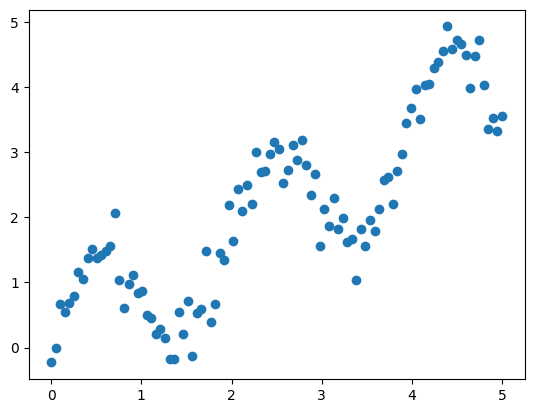

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5938013176050014


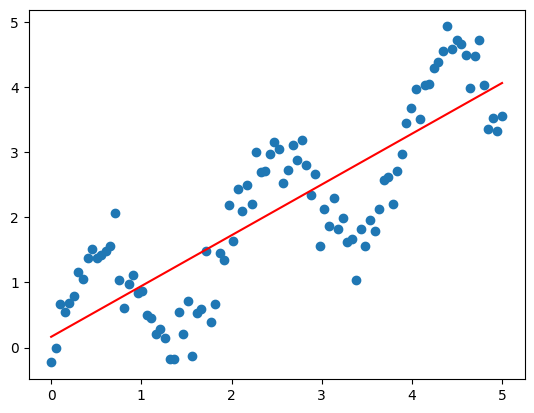

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
# 每筆資料都有5個維度
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

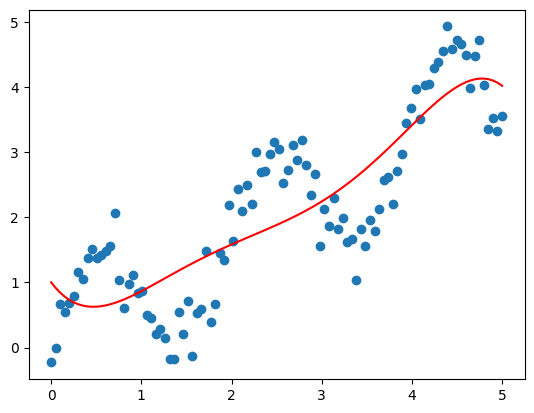

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.85711888  2.85407584 -1.42810967  0.32084347 -0.02593935]
interception:  1.0025313942332403


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.00253139, 0.91583568, 0.84262518, 0.78186992, 0.73258795,
       0.69384436, 0.66475026, 0.64446172, 0.63217881, 0.6271445 ,
       0.62864372, 0.63600225, 0.64858579, 0.66579886, 0.6870838 ,
       0.71191978, 0.73982173, 0.77033934, 0.80305604, 0.83758798,
       0.87358298, 0.91071954, 0.9487058 , 0.98727853, 1.02620207,
       1.06526737, 1.10429092, 1.14311372, 1.1816003 , 1.21963767,
       1.25713428, 1.29401905, 1.3302403 , 1.36576473, 1.40057643,
       1.43467582, 1.46807865, 1.50081498, 1.53292813, 1.5644737 ,
       1.59551848, 1.62613952, 1.65642302, 1.68646336, 1.71636206,
       1.74622675, 1.77617015, 1.80630908, 1.83676338, 1.86765493,
       1.89910661, 1.93124129, 1.96418078, 1.99804483, 2.03295012,
       2.0690092 , 2.1063295 , 2.14501228, 2.18515162, 2.22683342,
       2.27013433, 2.31512077, 2.36184787, 2.41035849, 2.46068216,
       2.51283407, 2.56681405, 2.62260555, 2.6801746 , 2.73946882,
       2.80041635, 2.86292488, 2.92688057, 2.9921471 , 3.05856

In [15]:
regr_poly.predict(X_poly)

array([1.00253139, 0.91583568, 0.84262518, 0.78186992, 0.73258795,
       0.69384436, 0.66475026, 0.64446172, 0.63217881, 0.6271445 ,
       0.62864372, 0.63600225, 0.64858579, 0.66579886, 0.6870838 ,
       0.71191978, 0.73982173, 0.77033934, 0.80305604, 0.83758798,
       0.87358298, 0.91071954, 0.9487058 , 0.98727853, 1.02620207,
       1.06526737, 1.10429092, 1.14311372, 1.1816003 , 1.21963767,
       1.25713428, 1.29401905, 1.3302403 , 1.36576473, 1.40057643,
       1.43467582, 1.46807865, 1.50081498, 1.53292813, 1.5644737 ,
       1.59551848, 1.62613952, 1.65642302, 1.68646336, 1.71636206,
       1.74622675, 1.77617015, 1.80630908, 1.83676338, 1.86765493,
       1.89910661, 1.93124129, 1.96418078, 1.99804483, 2.03295012,
       2.0690092 , 2.1063295 , 2.14501228, 2.18515162, 2.22683342,
       2.27013433, 2.31512077, 2.36184787, 2.41035849, 2.46068216,
       2.51283407, 2.56681405, 2.62260555, 2.6801746 , 2.73946882,
       2.80041635, 2.86292488, 2.92688057, 2.9921471 , 3.05856

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

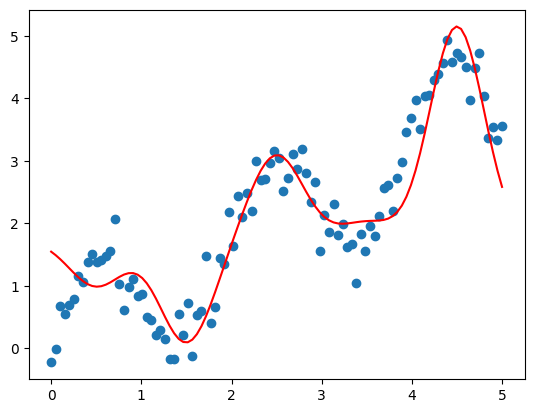

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [22]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.73768828 -1.64008519  1.36637988  0.28748811  3.41948446]
interception:  1.7292186324544268


#### Comparison

In [23]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

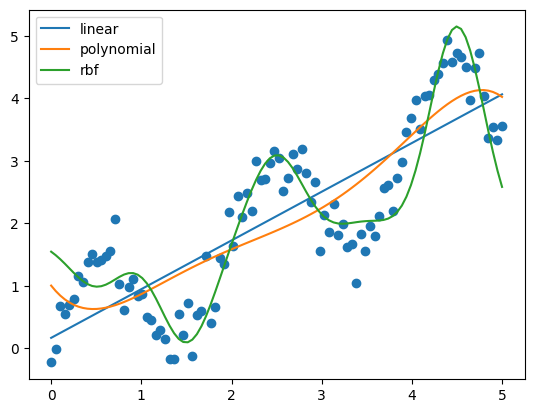

In [24]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [25]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5938013176050014


In [26]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5412332055724577


In [27]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2609084681518031
